In [1]:
import pandas as pd
import numpy as np
import glob

file_list = glob.glob('./mem_dumps/memory_dump_event_*.csv')

import re

def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else -1

file_list = sorted(file_list, key=extract_number)


value_arrays = []

for filename in file_list:
    df = pd.read_csv(filename)
    vals = df['ch0'].to_numpy()
    vals_reshaped = vals.reshape(8, 8)   # Reshape to 8x8
    value_arrays.append(vals_reshaped)


In [2]:
events = []
with open('test_events.txt', 'r') as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith('//'):
            continue  # Skip blank or comment lines
        x, y = map(int, line.split(','))
        events.append((x, y))


In [20]:
len(events)

10

In [81]:
import matplotlib.pyplot as plt

def plot_array_with_events(array, events, title=""):
    plt.imshow(array, cmap='viridis', interpolation='none', vmin=-7, vmax=7)
    if events:  # Only plot if events list is not empty
        ey, ex = zip(*events)
        plt.scatter(ex, ey, color='red', marker='o', s=80, edgecolor='black')
    plt.colorbar(label='value')
    
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [39]:
testKernel = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

In [40]:
from scipy.signal import correlate2d
#construct an array of len(events) of np.zeros((8, 8), dtype=np.float32)
test_kernel_results = np.zeros((len(events), 8, 8), dtype=np.float32)

for idx, event in enumerate(events):
    x, y = event
    temp_image = np.zeros((8, 8), dtype=np.float32)
    temp_image[x, y] = 1.0  # Set the event location to 1.0
    # Perform 2D correlation with the test kernel
    result = correlate2d(temp_image, testKernel, mode='same', boundary='fill', fillvalue=0)
    test_kernel_results[idx] = result


(0, 4)


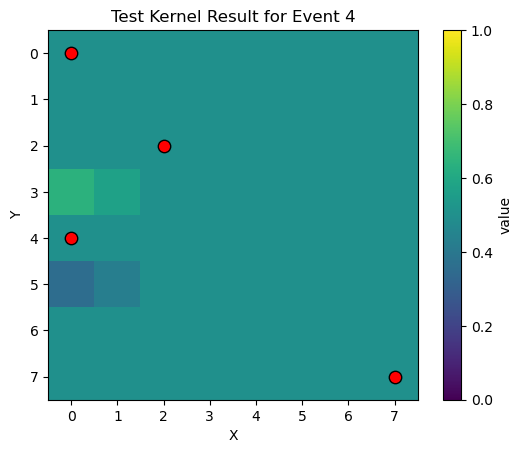

In [84]:
idx = 3
print(events[idx+1])
plot_array_with_events(test_kernel_results[idx], events[:idx+1], title=f"Test Kernel Result for Event {idx + 1}")

(0, 4)


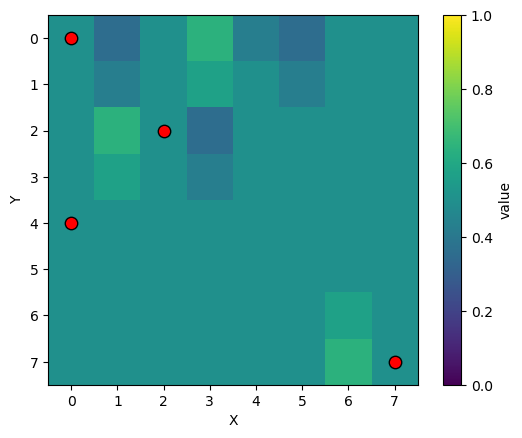

In [90]:
idx = 4
print(events[idx])
plot_array_with_events(value_arrays[idx], events[:idx])

In [6]:
kernel_offset: int = 3//2
img_h, img_w = 8, 8
event_coord: tuple[int, int] = (0, 4)

coord_count: int = 0
coord_List_ready: bool = False
coords_list: list[tuple[int, int]] = [(0,0)]*10
kernel_idx: list[int] = [0]*10

coord_counter: int = 0
kernel_idx_counter: int = 0

for dx in range (-kernel_offset, kernel_offset+1):
    for dy in range (-kernel_offset, kernel_offset+1):
        #print(f"dx: {dx}, dy: {dy}")
        
        _x = event_coord[0] + dx
        _y = event_coord[1] + dy

        if (
            _x < img_w and _x >= 0 and
            _y < img_h and _y >= 0
        ):
            new_coord = (_x, _y)
            coords_list[coord_counter] = new_coord
            kernel_idx[coord_counter] = kernel_idx_counter
            coord_counter += 1

        kernel_idx_counter += 1 

print(f"coords_list: {coords_list}")
print(f"kernel_idx: {kernel_idx}")


coords_list: [(0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5), (0, 0), (0, 0), (0, 0), (0, 0)]
kernel_idx: [3, 4, 5, 6, 7, 8, 0, 0, 0, 0]
